Python Project - Marvel Mart Project    
Gabriel Marken    
(02/26/21)

In [285]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='ticks', palette='Set2')
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

# Part 1: Cleaning the data

Hints from Instructor:
     
Test for missing values FIRST then if you find the ones that are missing, you don't have to test those for incorrect values.     
doing large number sums with floats in Python usually produces scientific notation but we don't want that. You can turn that off by putting the following line under the import statements at the start of the script: pd.set_option('display.float_format', lambda x: '%.3f' % x    
While it is possible and acceptable to produce a non-pandas using solution, I would suggest that you use pandas Dataframes for this. It makes a difficult job much easier. The guide to how to do that is here and some other resources:

In [601]:
# This is checking which columns don't have all the data they need and then finding out which 
# dtype each column should have
data = pd.read_csv('Datasamples/MM_Sales.csv')
print(data.shape)
print(data.count())

print("\n")
display(data.head())
print(data.dtypes)

(50000, 17)
Region            50000
Country           50000
Item Type         49994
Sales Channel     50000
Order Priority    49985
Order Date        50000
Order ID          50000
Ship Date         50000
Units Sold        50000
Unit Price        50000
Unit Cost         50000
Total Revenue     50000
Total Cost        50000
Total Profit      50000
Unnamed: 14           0
Unnamed: 15           0
Unnamed: 16           0
dtype: int64




/Users/gabriel/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,Sub-Saharan Africa,Namibia,Household,Offline,M,8/31/15,897751939,10/12/15,3604,668.270,502.540,2408445.080,1811154.160,597290.920,nan,nan,nan
1,Europe,Iceland,Baby Food,Offline,L,11/20/10,599480426,1/9/11,8435,255.280,159.420,2153286.800,1344707.700,808579.100,nan,nan,nan
2,Europe,Russia,Meat,Online,L,6/22/17,538911855,6/25/17,4848,421.890,364.690,2045322.720,1768017.120,277305.600,nan,nan,nan
3,Europe,Moldova,Meat,Online,L,2/28/12,459845054,3/20/12,7225,421.890,364.690,3048155.250,2634885.250,413270.000,nan,nan,nan
4,Europe,Malta,Cereal,Online,H,8/12/10,626391351,9/13/10,1975,205.700,117.110,406257.500,231292.250,174965.250,nan,nan,nan


Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID           object
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
Unnamed: 14       float64
Unnamed: 15       float64
Unnamed: 16       float64
dtype: object


In [602]:
# making data frame from csv file  
data = pd.read_csv("DataSamples/MM_Sales.csv")  
    
# creating bool series True for NaN values  
bool_series = pd.isnull(data["Country"])  
    
# filtering data  
# displaying data only with Item Type = NaN  
data[bool_series]

/Users/gabriel/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Unnamed: 14,Unnamed: 15,Unnamed: 16


In [603]:
# making data frame from csv file  
data = pd.read_csv("DataSamples/MM_Sales.csv")  
    
# creating bool series True for NaN values  
bool_series = pd.isnull(data["Item Type"])  
    
# filtering data  
# displaying data only with Item Type = NaN  
data[bool_series]

/Users/gabriel/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Unnamed: 14,Unnamed: 15,Unnamed: 16
11,Middle East and North Africa,Afghanistan,NaN,Online,C,10/21/16,620358741,12/1/16,6792,437.200,263.330,2969462.400,1788537.360,1180925.040,nan,nan,nan
321,Europe,France,NaN,Online,M,1/23/15,714754474,2/5/15,587,668.270,502.540,392274.490,294990.980,97283.510,nan,nan,nan
14519,Central America and the Caribbean,Nicaragua,NaN,Online,H,2/21/13,391752135,3/28/13,7017,651.210,524.960,4569540.570,3683644.320,885896.250,nan,nan,nan
14520,Australia and Oceania,Vanuatu,NaN,Online,M,6/3/14,282816255,6/23/14,469,154.060,90.930,72254.140,42646.170,29607.970,nan,nan,nan
47186,Europe,Austria,NaN,Offline,L,5/17/11,864141499,5/24/11,7528,81.730,56.670,615263.440,426611.760,188651.680,nan,nan,nan
47188,Europe,Romania,NaN,Online,M,3/31/16,818466699,5/3/16,1339,154.060,90.930,206286.340,121755.270,84531.070,nan,nan,nan


In [604]:
# making data frame from csv file  
data = pd.read_csv("DataSamples/MM_Sales.csv")  
    
# creating bool series True for NaN values  
bool_series = pd.isnull(data["Order Priority"])  
    
# filtering data  
# displaying data only with Item Type = NaN  
data[bool_series]

/Users/gabriel/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Unnamed: 14,Unnamed: 15,Unnamed: 16
13,Middle East and North Africa,Lebanon,Vegetables,Offline,NaN,10/15/10,660954082,11/19/10,9855,154.060,90.930,1518261.300,896115.150,622146.150,nan,nan,nan
189,Europe,France,Cosmetics,Online,NaN,8/2/10,670038402,9/16/10,8108,437.200,263.330,3544817.600,2135079.640,1409737.960,nan,nan,nan
259,Central America and the Caribbean,Belize,Fruits,Offline,NaN,11/18/16,238470542,12/2/16,7588,9.330,6.920,70796.040,52508.960,18287.080,nan,nan,nan
364,Sub-Saharan Africa,Angola,Personal Care,Online,NaN,4/21/15,307722604,4/30/15,812,81.730,56.670,66364.760,46016.040,20348.720,nan,nan,nan
469,Asia,Tajikistan,Clothes,Online,NaN,2/26/11,857914912,4/15/11,4942,109.280,35.840,540061.760,177121.280,362940.480,nan,nan,nan
644,Sub-Saharan Africa,Nigeria,Clothes,Online,NaN,7/11/17,468462884,8/4/17,7432,109.280,35.840,812168.960,266362.880,545806.080,nan,nan,nan
784,Sub-Saharan Africa,Lesotho,Meat,Online,NaN,4/27/10,251652848,5/22/10,8525,421.890,364.690,3596612.250,3108982.250,487630.000,nan,nan,nan
924,Middle East and North Africa,United Arab Emirates,Household,Offline,NaN,6/12/17,549222695,6/13/17,6055,668.270,502.540,4046374.850,3042879.700,1003495.150,nan,nan,nan
1064,Middle East and North Africa,Saudi Arabia,Baby Food,Online,NaN,3/1/12,995547425,3/18/12,3461,255.280,159.420,883524.080,551752.620,331771.460,nan,nan,nan
3969,Sub-Saharan Africa,Cape Verde,Fruits,Online,NaN,12/19/15,307628619,2/3/16,2999,9.330,6.920,27980.670,20753.080,7227.590,nan,nan,nan


In [605]:
# making data frame from csv file  
data = pd.read_csv("DataSamples/MM_Sales.csv")  
    
# creating bool series True for NaN values  
bool_series = pd.isnull(data["Order ID"])  
    
# filtering data  
# displaying data only with Item Type = NaN  
data[bool_series]

/Users/gabriel/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Unnamed: 14,Unnamed: 15,Unnamed: 16


In [606]:
# this drops the three extra colmns on the end which have no purpose
cleanData = data.dropna(axis = 1, how ='all')  
    
cleanData

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Namibia,Household,Offline,M,8/31/15,897751939,10/12/15,3604,668.270,502.540,2408445.080,1811154.160,597290.920
1,Europe,Iceland,Baby Food,Offline,L,11/20/10,599480426,1/9/11,8435,255.280,159.420,2153286.800,1344707.700,808579.100
2,Europe,Russia,Meat,Online,L,6/22/17,538911855,6/25/17,4848,421.890,364.690,2045322.720,1768017.120,277305.600
3,Europe,Moldova,Meat,Online,L,2/28/12,459845054,3/20/12,7225,421.890,364.690,3048155.250,2634885.250,413270.000
4,Europe,Malta,Cereal,Online,H,8/12/10,626391351,9/13/10,1975,205.700,117.110,406257.500,231292.250,174965.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Central America and the Caribbean,Dominican Republic,Baby Food,Online,L,2/12/15,350891578,3/15/15,5470,255.280,159.420,1396381.600,872027.400,524354.200
49996,Central America and the Caribbean,Cuba,Office Supplies,Online,H,3/28/13,748260629,5/3/13,5803,651.210,524.960,3778971.630,3046342.880,732628.750
49997,Asia,Vietnam,Personal Care,Online,M,11/11/16,322932231,12/18/16,1678,81.730,56.670,137142.940,95092.260,42050.680
49998,Sub-Saharan Africa,Sierra Leone,Clothes,Offline,M,8/28/10,492142713,9/21/10,4820,109.280,35.840,526729.600,172748.800,353980.800


In [607]:
# This chnges an missing or nan values to the string, "NULL"
cleanData[['Item Type','Order Priority']] = cleanData[['Item Type','Order Priority']].fillna('NULL')

/Users/gabriel/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [608]:
# This drops all columns which contain the string "NULL".
cleanData = cleanData[cleanData["Item Type"].str.contains("NULL")==False]
cleanData = cleanData[cleanData["Order Priority"].str.contains("NULL")==False]
cleanData

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Namibia,Household,Offline,M,8/31/15,897751939,10/12/15,3604,668.270,502.540,2408445.080,1811154.160,597290.920
1,Europe,Iceland,Baby Food,Offline,L,11/20/10,599480426,1/9/11,8435,255.280,159.420,2153286.800,1344707.700,808579.100
2,Europe,Russia,Meat,Online,L,6/22/17,538911855,6/25/17,4848,421.890,364.690,2045322.720,1768017.120,277305.600
3,Europe,Moldova,Meat,Online,L,2/28/12,459845054,3/20/12,7225,421.890,364.690,3048155.250,2634885.250,413270.000
4,Europe,Malta,Cereal,Online,H,8/12/10,626391351,9/13/10,1975,205.700,117.110,406257.500,231292.250,174965.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Central America and the Caribbean,Dominican Republic,Baby Food,Online,L,2/12/15,350891578,3/15/15,5470,255.280,159.420,1396381.600,872027.400,524354.200
49996,Central America and the Caribbean,Cuba,Office Supplies,Online,H,3/28/13,748260629,5/3/13,5803,651.210,524.960,3778971.630,3046342.880,732628.750
49997,Asia,Vietnam,Personal Care,Online,M,11/11/16,322932231,12/18/16,1678,81.730,56.670,137142.940,95092.260,42050.680
49998,Sub-Saharan Africa,Sierra Leone,Clothes,Offline,M,8/28/10,492142713,9/21/10,4820,109.280,35.840,526729.600,172748.800,353980.800


1       

Test for incorrect values for Country (will be a number as a string) and Order ID (won't be a number)

In [609]:
# This is testing to find aall rows in Order ID which are not numeric
res = cleanData[pd.to_numeric(cleanData['Order ID'], errors='coerce').isnull()]
res

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
18738,Central America and the Caribbean,Dominica,Cosmetics,Offline,H,3/7/12,Cosmetics,4/18/12,1365,437.200,263.330,596778.000,359445.450,237332.550
19040,Asia,Philippines,Fruits,Online,H,7/7/13,Fruits,7/25/13,6052,9.330,6.920,56465.160,41879.840,14585.320
19302,Europe,Lithuania,Snacks,Online,L,12/27/12,Snacks,1/4/13,1203,152.580,97.440,183553.740,117220.320,66333.420
19472,Central America and the Caribbean,Saint Lucia,Meat,Offline,M,4/18/17,Meat,4/19/17,8468,421.890,364.690,3572564.520,3088194.920,484369.600
19473,Central America and the Caribbean,Guatemala,Snacks,Offline,H,12/20/13,Snacks,1/10/14,9053,152.580,97.440,1381306.740,882124.320,499182.420


In [592]:
# This tests to show all numbers in "Country" which contain at least one digit of a number
nums = np.column_stack([cleanData["Country"].str.contains(r"0|1|2|3|4|5|6|7|8|9", na=False) for Country in cleanData])
cleanData.loc[nums.any(axis=1)]

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit


In [613]:
#This changes all rows in "Country" which contain a number to "NULL"
nm = [8116, 21183, 30583]
for t in nm:
    cleanData.loc[t, 'Country'] = "NULL"

In [614]:
# This changes all rows in "Order ID" which contain a string to "0"
num = [18738, 19040, 19302, 19472, 19473]
for t in num:
    cleanData.loc[t, 'Order ID'] = 0

In [615]:
# This deletes all values = "NULL" values in "Country" and all values = "0" in "Order ID"
cleanData = cleanData[cleanData["Country"].str.contains("NULL")==False]
a=cleanData.index[cleanData["Order ID"] == 0].tolist()
cleanData=cleanData.drop(cleanData.index[a])
cleanData

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Namibia,Household,Offline,M,8/31/15,897751939,10/12/15,3604,668.270,502.540,2408445.080,1811154.160,597290.920
1,Europe,Iceland,Baby Food,Offline,L,11/20/10,599480426,1/9/11,8435,255.280,159.420,2153286.800,1344707.700,808579.100
2,Europe,Russia,Meat,Online,L,6/22/17,538911855,6/25/17,4848,421.890,364.690,2045322.720,1768017.120,277305.600
3,Europe,Moldova,Meat,Online,L,2/28/12,459845054,3/20/12,7225,421.890,364.690,3048155.250,2634885.250,413270.000
4,Europe,Malta,Cereal,Online,H,8/12/10,626391351,9/13/10,1975,205.700,117.110,406257.500,231292.250,174965.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Central America and the Caribbean,Dominican Republic,Baby Food,Online,L,2/12/15,350891578,3/15/15,5470,255.280,159.420,1396381.600,872027.400,524354.200
49996,Central America and the Caribbean,Cuba,Office Supplies,Online,H,3/28/13,748260629,5/3/13,5803,651.210,524.960,3778971.630,3046342.880,732628.750
49997,Asia,Vietnam,Personal Care,Online,M,11/11/16,322932231,12/18/16,1678,81.730,56.670,137142.940,95092.260,42050.680
49998,Sub-Saharan Africa,Sierra Leone,Clothes,Offline,M,8/28/10,492142713,9/21/10,4820,109.280,35.840,526729.600,172748.800,353980.800


In [263]:
# this writes the clean data to a new csv file
cleanData.to_csv('DataSamples/MM_Sales_clean.csv')

# Part 2

Number 1   
"We want to know which countries we sell the most so we can pick a new location to build a shipping center. Rank the Top 10 countries we sell to the most to least along with the number of sales we've had with that country." (note you are getting a count of the number of sale transactions here not the sum of the total sales)

In [273]:
newData = pd.read_csv('Datasamples/MM_Sales_clean.csv')

Number 1 (A)   
Use Seaborn or Matplotlib to create a chart of your choice showing these top 10 values by country.    
We have shipping centers in Trinidad and Tobago, Guinea, and Maldives right now. Which country should we build a shipping center in based on most sales and lack of shipping center? Please justify your reasoning.

In [283]:
# find how many transactions we have done with each country
unitsByCountry = newData.groupby("Country")['Units Sold'].count()

# convert ^ to dataframe
uc = unitsByCountry.to_frame().reset_index()

# get top 10 countries by sales
uc = uc.sort_values(by=['Units Sold'], ascending=False)
uc10 = uc.head(10)
print(uc10)

                              Country  Units Sold
168               Trinidad and Tobago         321
62                             Guinea         318
27                         Cape Verde         314
97                           Maldives         311
52                            Finland         310
38   Democratic Republic of the Congo         308
137                            Samoa          306
99                              Malta         305
30                              China         303
152                       South Sudan         302


/Users/gabriel/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Transactions per Country')

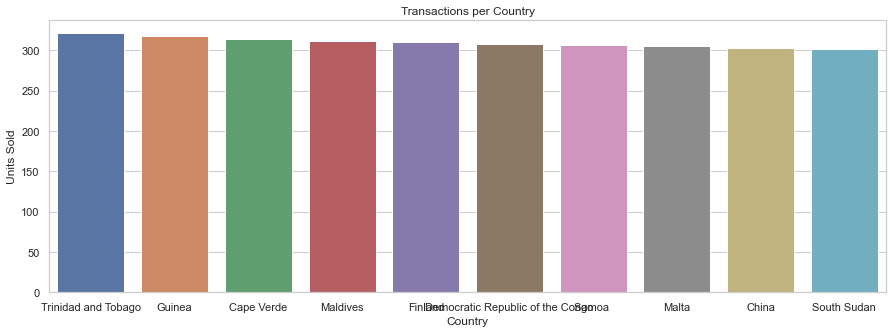

In [571]:
# This is a bar graph showing the number of transactions per country (top 10)
sns.set(style='whitegrid')
plt.figure(figsize=(15,5))
ax = sns.barplot(uc10['Country'], uc10['Units Sold'])
ax.set_title('Transactions per Country')

Number 1 (B)

Write the results to a text file called MM_Rankings.txt.    
Be sure to use append so that you can append data rather than writing over top of the previous data.    
Include a newline between each append to the file.    
When writing to the file, please output in a text form such as:

In [471]:
# This writes a to file using the 'uc10' data and adds a new line reading 
# "Countries with the most transactions:"
tfile = open('DataSamples/MM_Rankings.txt', 'a')
tfile.write('Countries with the most transactions: \n')
tfile.write(uc10.to_string())
tfile.close()

In [472]:
# This code is meant to delete the second line in the txt file
lines = []

with open('DataSamples/MM_Rankings.txt', 'r') as f:
    lines = f.readlines()

with open('DataSamples/MM_Rankings.txt', 'w') as f:
    f.writelines(lines[:1] + lines[2:]) # This will skip the second line

In [473]:
# All of this code replaces the first half of the string with the country number on each line

reading_file = open('DataSamples/MM_Rankings.txt', 'r')

new_file_content = ""
for line in reading_file:
    stripped_line = line.strip()
    new_line = stripped_line.replace("168               Trinidad and Tobago        ", "Trinidad and Tobago:")
    new_file_content += new_line +"\n"
reading_file.close()

writing_file = open('DataSamples/MM_Rankings.txt', "w")
writing_file.write(new_file_content)
writing_file.close()

reading_file = open('DataSamples/MM_Rankings.txt', 'r')

new_file_content = ""
for line in reading_file:
    stripped_line = line.strip()
    new_line = stripped_line.replace("62                             Guinea        ", "Guinea:")
    new_file_content += new_line +"\n"
reading_file.close()

writing_file = open('DataSamples/MM_Rankings.txt', "w")
writing_file.write(new_file_content)
writing_file.close()

reading_file = open('DataSamples/MM_Rankings.txt', 'r')

new_file_content = ""
for line in reading_file:
    stripped_line = line.strip()
    new_line = stripped_line.replace("27                         Cape Verde        ", "Cape Verde:")
    new_file_content += new_line +"\n"
reading_file.close()

writing_file = open('DataSamples/MM_Rankings.txt', "w")
writing_file.write(new_file_content)
writing_file.close()

reading_file = open('DataSamples/MM_Rankings.txt', 'r')

new_file_content = ""
for line in reading_file:
    stripped_line = line.strip()
    new_line = stripped_line.replace("97                           Maldives        ", "Maldives:")
    new_file_content += new_line +"\n"
reading_file.close()

writing_file = open('DataSamples/MM_Rankings.txt', "w")
writing_file.write(new_file_content)
writing_file.close()

reading_file = open('DataSamples/MM_Rankings.txt', 'r')

new_file_content = ""
for line in reading_file:
    stripped_line = line.strip()
    new_line = stripped_line.replace("52                            Finland        ", "Finland:")
    new_file_content += new_line +"\n"
reading_file.close()

writing_file = open('DataSamples/MM_Rankings.txt', "w")
writing_file.write(new_file_content)
writing_file.close()

reading_file = open('DataSamples/MM_Rankings.txt', 'r')

new_file_content = ""
for line in reading_file:
    stripped_line = line.strip()
    new_line = stripped_line.replace("38   Democratic Republic of the Congo        ", "Democratic Republic of the Congo:")
    new_file_content += new_line +"\n"
reading_file.close()

writing_file = open('DataSamples/MM_Rankings.txt', "w")
writing_file.write(new_file_content)
writing_file.close()

reading_file = open('DataSamples/MM_Rankings.txt', 'r')

new_file_content = ""
for line in reading_file:
    stripped_line = line.strip()
    new_line = stripped_line.replace("137                            Samoa         ", "Samoa:")
    new_file_content += new_line +"\n"
reading_file.close()

writing_file = open('DataSamples/MM_Rankings.txt', "w")
writing_file.write(new_file_content)
writing_file.close()

reading_file = open('DataSamples/MM_Rankings.txt', 'r')

new_file_content = ""
for line in reading_file:
    stripped_line = line.strip()
    new_line = stripped_line.replace("99                              Malta        ", "Malta:")
    new_file_content += new_line +"\n"
reading_file.close()

writing_file = open('DataSamples/MM_Rankings.txt', "w")
writing_file.write(new_file_content)
writing_file.close()

reading_file = open('DataSamples/MM_Rankings.txt', 'r')

new_file_content = ""
for line in reading_file:
    stripped_line = line.strip()
    new_line = stripped_line.replace("30                              China        ", "China:")
    new_file_content += new_line +"\n"
reading_file.close()

writing_file = open('DataSamples/MM_Rankings.txt', "w")
writing_file.write(new_file_content)
writing_file.close()

reading_file = open('DataSamples/MM_Rankings.txt', 'r')

new_file_content = ""
for line in reading_file:
    stripped_line = line.strip()
    new_line = stripped_line.replace("152                       South Sudan        ", "South Sudan:")
    new_file_content += new_line +"\n"
reading_file.close()

writing_file = open('DataSamples/MM_Rankings.txt', "w")
writing_file.write(new_file_content)
writing_file.close()


In [474]:
# Adds a recomendation of what to do at the end of the data
print('\n')
with open("DataSamples/MM_Rankings.txt", "a+") as writer:
    writer.write("The country we should build our shipping center is Cape Verde because it's the third most used location and it's the only location in the top four that does not have a shipping center already in place.")

Number 2

"Now we will need you to determine how many online and offline orders that our company takes. Also, if you could let us know the count of the different Order Priority types, that would be great. Please show us this in a pie chart format."    

2(A). Determine the count for how many online and offline orders we take.

In [475]:
# find how many transactions we have done with each country
print('Number of sales in each medium:')
sChannel = newData['Sales Channel'].value_counts() 
print(sChannel) 

print('\n')

Number of sales in each medium:
Online     30181
Offline    19790
Name: Sales Channel, dtype: int64




2(B)   
Determine the count of the different Order Priority types.

In [476]:
# This creates a count of how much each type of order priority was encountered
op = newData['Order Priority'].value_counts() 
print(op) 

M    19881
H    15093
L     9985
C     5012
Name: Order Priority, dtype: int64


2(C)    
Create a pie chart for each showing the differences in values 

Text(0.5, 1.0, 'Order Priority Dist.')

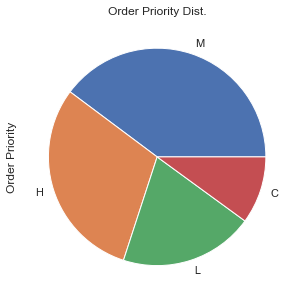

In [574]:
# This creates a pie chart of the order priority dist
plot = op.plot.pie(y='Order Priority', figsize=(10, 5))
plt.title("Order Priority Dist.")

2(D)     
Add the results of the highest sales channel type and the highest order priority to the file MM_Rankings.txt.

In [478]:
# This appends the sChannel data to MM_rankings.txt
tfile = open('DataSamples/MM_Rankings.txt', 'a')
tfile.write('\n Sales Channels: \n')
tfile.write(sChannel.to_string())
tfile.write('\n We do more online sales.')
tfile.close()

In [479]:
# This appends more lines to help with formatting of MM_Rankings
tfile = open('DataSamples/MM_Rankings.txt', 'a')
tfile.write('\n Order Priorities: \n')
tfile.write(op.to_string())
tfile.write('\n We do more M order priorities.')
tfile.close()

Number 3

"For our next section, we will need you to give us an idea of how well our Item Types are producing profits for us. At the end, report to us which 3 item types are providing the most profit."

3(A)         
Create a Boxplot using Seaborn showing the Total Profits DISTRIBUTION by Item Type.

/Users/gabriel/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


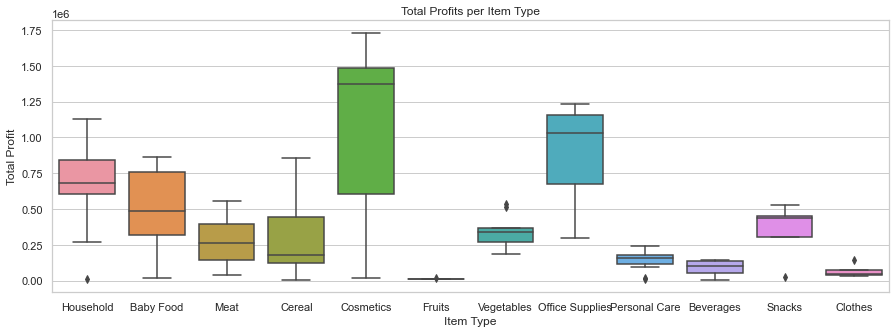

In [575]:
#This is a box plot of the total profits as they compare to item type. 
plt.figure(figsize=(15,5))
plt.title('Total Profits per Item Type')
ax = sns.boxplot(newData['Item Type'], newData['Total Profit'][0:100])

3(B)         
Determine the sum of Total Profit by Item Type.

In [481]:
profitByIT = newData.groupby("Item Type")['Total Profit'].sum()
print(profitByIT)

Item Type
Baby Food         1942212941.520
Beverages          327439168.200
Cereal            1824726412.290
Clothes           1520832019.680
Cosmetics         3638645299.300
Fruits              51018591.400
Household         3401180998.060
Meat              1196403551.200
Office Supplies   2605440187.500
Personal Care      535250525.600
Snacks            1149752481.960
Vegetables        1322639660.240
Name: Total Profit, dtype: float64


3(C)        


<AxesSubplot:title={'center':'Item Type by Occurance'}>

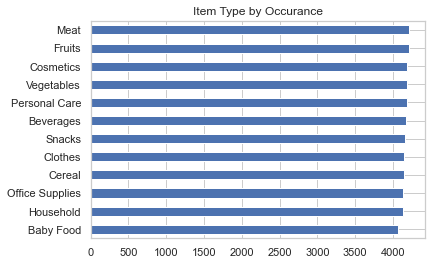

In [576]:
#This shows us the dfferent types item types ranked by the number of occurances

# Plotting Data
plt.title('Item Type by Occurance')
newData['Item Type'].value_counts().sort_values().plot(kind = 'barh')


3(D).          
Now, using Python, rank the top 3 item types we did the most sales (brought in most profit) in to the least sales. (Use 'Total Profit' to determine this).  Please list the item types and the amount sold.


In [486]:
# This counts the data in the Item Type columns
itSums = newData['Item Type'].value_counts()
# This finds the profit of each Item Type
ppu = profitByIT/itSums
print(ppu)

Baby Food         476733.663
Beverages          78522.582
Cereal            440648.735
Clothes           366200.823
Cosmetics         868204.557
Fruits             12098.314
Household         822335.831
Meat              283575.148
Office Supplies   629789.748
Personal Care     127958.529
Snacks            276249.996
Vegetables        315816.538
dtype: float64


In [490]:
# This creates a df from the ppu data
= ppu.to_frame().reset_index()
ppuDF.columns = ['ItemType', 'ProfitPerUnit']

In [492]:
# This orders the ppuDF in descending order
descPpuDF = ppuDF.sort_values('ProfitPerUnit', ascending=False)
df3 = descPpuDF.head(3) 
print(df3)

          ItemType  ProfitPerUnit
4        Cosmetics     868204.557
6        Household     822335.831
8  Office Supplies     629789.748


In [493]:
# This creates a list of the df3 data
df3.values.tolist()
print(df3)

          ItemType  ProfitPerUnit
4        Cosmetics     868204.557
6        Household     822335.831
8  Office Supplies     629789.748


3(E)           
Add the results of the top 3 item types to the file MM_Rankings.txt

In [495]:
# This appends df3 to MM_Rankings.txt
tfile = open('DataSamples/MM_Rankings.txt', 'a')
tfile.write('\n Highest Selling Items: \n')
tfile.write(df3.to_string())
tfile.close()

In [496]:
# This code is meant to delete the second line in the txt file
lines = []

with open('DataSamples/MM_Rankings.txt', 'r') as f:
    lines = f.readlines()

with open('DataSamples/MM_Rankings.txt', 'w') as f:
    f.writelines(lines[:23] + lines[24:]) # This will skip the 24th line to get rid of unwanted text

In [498]:
# This is similar to code used above to clean up the text in the txt file.
# It gets rid of large amounts of white space and unneeded numbers to increase readablility
reading_file = open('DataSamples/MM_Rankings.txt', 'r')

new_file_content = ""
for line in reading_file:
    stripped_line = line.strip()
    new_line = stripped_line.replace("4        Cosmetics    ", "Cosmetics:")
    new_file_content += new_line +"\n"
reading_file.close()

writing_file = open('DataSamples/MM_Rankings.txt', "w")
writing_file.write(new_file_content)
writing_file.close()

reading_file = open('DataSamples/MM_Rankings.txt', 'r')

new_file_content = ""
for line in reading_file:
    stripped_line = line.strip()
    new_line = stripped_line.replace("6        Household    ", "Household:")
    new_file_content += new_line +"\n"
reading_file.close()

writing_file = open('DataSamples/MM_Rankings.txt', "w")
writing_file.write(new_file_content)
writing_file.close()

reading_file = open('DataSamples/MM_Rankings.txt', 'r')

new_file_content = ""
for line in reading_file:
    stripped_line = line.strip()
    new_line = stripped_line.replace("8  Office Supplies    ", "Guinea:")
    new_file_content += new_line +"\n"
reading_file.close()

writing_file = open('DataSamples/MM_Rankings.txt', "w")
writing_file.write(new_file_content)
writing_file.close()

reading_file = open('DataSamples/MM_Rankings.txt', 'r')

3(F)          
Provide a markdown section discussing the results of the boxplots. Discuss what is being shown in the boxplots and do some business analytics around what sort of use this sort of chart might help in making decisions. Are there any unexpected results? Discuss them.

Box Plots:       
   In the box plots we see that cosmetics and office supplies bring in lots of revenue, though they are both unpredicatable and have larger variations. Snacks, Vegitables, and Household items are far more predictable, though they don't have as much potential.    
        
   This chart is useful for budgeting as well as deciding if there are any produts worth dropping. If we are considering dropping a product, fruits, clothes, and beverages are all good candidates as they have really low profits(if any). We can also see that we can't rely on cosmetics to be as high as they have the potential to be since they won't always be there.        
        
   As far as unexpected results, I'm surprised that beverages aren't more profitable. They are near the bottom which is odd since they traditionally have a high profit margin.
        

Number 4    
"Finally, we need you to determine some descriptive statistics for us. Please determine the sum, average and maximum values for the Units Sold, Unit Cost, Total Revenue, Total Cost and Total Profit. Please put this in a report."

4(A)    
Produce the data above for the sum of the requested columns. (Units Sold, Unit Cost, Total Revenue, Total Cost and Total Profit)

In [502]:
# This finds the sum of each column desired
sumUS = newData['Units Sold'].sum()
print(sumUS)
sumUC = newData['Unit Cost'].sum()
print(sumUC)
sumTR = newData['Total Revenue'].sum()
print(sumTR)
sumTC = newData['Total Cost'].sum()
print(sumTC)
sumTP = newData['Total Profit'].sum()
print(sumTP)

249810100
9360937.88
66144082560.7
46628540723.75
19515541836.949997


4(B)

In [504]:
# This finds the average of each column desired
avgUS = newData['Units Sold'].mean()
print(avgUS)
avgUC = newData['Unit Cost'].mean()
print(avgUC)
avgTR = newData['Total Revenue'].mean()
print(avgTR)
avgTC = newData['Total Cost'].mean()
print(avgTC)
avgTP = newData['Total Profit'].mean()
print(avgTP)

4999.101478857738
187.32740749633527
1323649.3678473434
933112.0194462783
390537.34840107465


4(C)

In [505]:
# This finds the max value of each column desired
maxUS = newData['Units Sold'].max()
print(maxUS)
maxUC = newData['Unit Cost'].max()
print(maxUC)
maxTR = newData['Total Revenue'].max()
print(maxTR)
maxTC = newData['Total Cost'].max()
print(maxTC)
maxTP = newData['Total Profit'].max()
print(maxTP)

10000
524.96
6682031.73
5249075.04
1738178.39


In [508]:
# This creates a df of the sums of the values in the given columns
sums = {'Sums:':  ['Units Sold:', 'Unit Cost:', 'Total Revenue:', 'Total Cost:', 'Total Profit:'],
        ' ': (sumUS, sumUC, sumTR, sumTC, sumTP),
        }

sumsDF = pd.DataFrame (sums, columns = ['Sums:', ' '])

print(sumsDF)

            Sums:                
0     Units Sold:   249810100.000
1      Unit Cost:     9360937.880
2  Total Revenue: 66144082560.700
3     Total Cost: 46628540723.750
4   Total Profit: 19515541836.950


In [509]:
# This creates a df of averages of the given columns
avgs = {'Averages:':  ['Units Sold:', 'Unit Cost:', 'Total Revenue:', 'Total Cost:', 'Total Profit:'],
        ' ': (avgUS, avgUC, avgTR, avgTC, avgTP),
        }

avgsDF = pd.DataFrame (avgs, columns = ['Averages:', ' '])

print(avgsDF)

        Averages:            
0     Units Sold:    4999.101
1      Unit Cost:     187.327
2  Total Revenue: 1323649.368
3     Total Cost:  933112.019
4   Total Profit:  390537.348


In [510]:
# This creates a df of maximum values in each given column
max = {'Maximums:':  ['Units Sold:', 'Unit Cost:', 'Total Revenue:', 'Total Cost:', 'Total Profit:'],
        ' ': (maxUS, maxUC, maxTR, maxTC, maxTP),
        }

maxDF = pd.DataFrame (max, columns = ['Maximums:', ' '])

print(maxDF)

        Maximums:            
0     Units Sold:   10000.000
1      Unit Cost:     524.960
2  Total Revenue: 6682031.730
3     Total Cost: 5249075.040
4   Total Profit: 1738178.390


4(D)

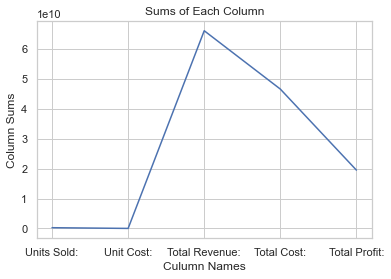

In [515]:
# This chart is of the sums of the different columns
y = (sumUS, sumUC, sumTR, sumTC, sumTP)
x = ['Units Sold:', 'Unit Cost:', 'Total Revenue:', 'Total Cost:', 'Total Profit:']
plt.plot(x, y)
plt.ylabel('Column Sums')
plt.xlabel('Culumn Names')
plt.title('Sums of Each Column')
plt.show()

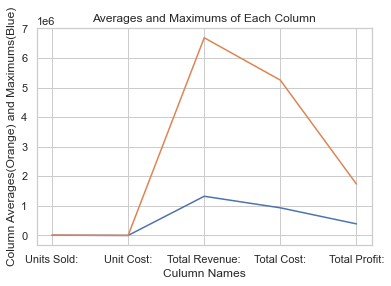

In [521]:
# This chart is of the Averages and Max values of the differnt columns
y = (avgUS, avgUC, avgTR, avgTC, avgTP)
z = (maxUS, maxUC, maxTR, maxTC, maxTP)
x = ['Units Sold:', 'Unit Cost:', 'Total Revenue:', 'Total Cost:', 'Total Profit:']
plt.plot(x, y, z)
#plt.zlabel('Column Maximums')
plt.ylabel('Column Averages(Orange) and Maximums(Blue)')
plt.xlabel('Culumn Names')
plt.title('Averages and Maximums of Each Column')
plt.show()

4(E)

In [522]:
# This appends/creates the MM_Calc.txt file and adds all the sums data to it
tfile = open('DataSamples/MM_Calc.txt', 'a')
tfile.write(sumsDF.to_string())
tfile.close()

In [523]:
# This appends all the Averages to the MM_Calc.txt file
tfile = open('DataSamples/MM_Calc.txt', 'a')
tfile.write('\n')
tfile.write(avgsDF.to_string())
tfile.close()

In [524]:
# This appends all the Max values to the MM_Calc.txt file
tfile = open('DataSamples/MM_Calc.txt', 'a')
tfile.write('\n')
tfile.write(maxDF.to_string())
tfile.close()

In [526]:
# All of this code replaces gets rid of any dead space in the beggining of the code to make the file more readable
reading_file = open('DataSamples/MM_Calc.txt', 'r')

new_file_content = ""
for line in reading_file:
    stripped_line = line.strip()
    new_line = stripped_line.replace("            ", "")
    new_file_content += new_line +"\n"
reading_file.close()

writing_file = open('DataSamples/MM_Calc.txt', "w")
writing_file.write(new_file_content)
writing_file.close()

reading_file = open('DataSamples/MM_Calc.txt', 'r')

new_file_content = ""
for line in reading_file:
    stripped_line = line.strip()
    new_line = stripped_line.replace("0     ", "")
    new_file_content += new_line +"\n"
reading_file.close()

writing_file = open('DataSamples/MM_Calc.txt', "w")
writing_file.write(new_file_content)
writing_file.close()

reading_file = open('DataSamples/MM_Calc.txt', 'r')

new_file_content = ""
for line in reading_file:
    stripped_line = line.strip()
    new_line = stripped_line.replace("1      ", "")
    new_file_content += new_line +"\n"
reading_file.close()

writing_file = open('DataSamples/MM_Calc.txt', "w")
writing_file.write(new_file_content)
writing_file.close()

reading_file = open('DataSamples/MM_Calc.txt', 'r')

new_file_content = ""
for line in reading_file:
    stripped_line = line.strip()
    new_line = stripped_line.replace("2  ", "")
    new_file_content += new_line +"\n"
reading_file.close()

writing_file = open('DataSamples/MM_Calc.txt', "w")
writing_file.write(new_file_content)
writing_file.close()

reading_file = open('DataSamples/MM_Calc.txt', 'r')

new_file_content = ""
for line in reading_file:
    stripped_line = line.strip()
    new_line = stripped_line.replace("3     ", "")
    new_file_content += new_line +"\n"
reading_file.close()

writing_file = open('DataSamples/MM_Calc.txt', "w")
writing_file.write(new_file_content)
writing_file.close()

reading_file = open('DataSamples/MM_Calc.txt', 'r')

new_file_content = ""
for line in reading_file:
    stripped_line = line.strip()
    new_line = stripped_line.replace("4   ", "")
    new_file_content += new_line +"\n"
reading_file.close()

writing_file = open('DataSamples/MM_Calc.txt', "w")
writing_file.write(new_file_content)
writing_file.close()

reading_file = open('DataSamples/MM_Calc.txt', 'r')

new_file_content = ""
for line in reading_file:
    stripped_line = line.strip()
    new_line = stripped_line.replace("        ", "")
    new_file_content += new_line +"\n"
reading_file.close()

writing_file = open('DataSamples/MM_Calc.txt', "w")
writing_file.write(new_file_content)
writing_file.close()

reading_file = open('DataSamples/MM_Calc.txt', 'r')

new_file_content = ""
for line in reading_file:
    stripped_line = line.strip()
    new_line = stripped_line.replace("        ", "")
    new_file_content += new_line +"\n"
reading_file.close()

writing_file = open('DataSamples/MM_Calc.txt', "w")
writing_file.write(new_file_content)
writing_file.close()

# Part 3

3(A)    
Please get a list of the Regions and then the countries we sell to in that region. Please be sure no duplicates Regions or countries exist.    
Please return this as a dictionary of lists with the keys of the dictionary being the name of each Region and the list attached to that being all the countries we sell to for that region. You may also return it as a Series of Lists (although I found that to be harder). Finally, if you want to use an alternate method with pandas Dataframes, that will be accepted as well. Be sure your output is easy to read and your code makes sense.

In [548]:
# This tells me the unique regions so I know what I'm working with
regions = newData.Region.unique()
print(regions)

['Sub-Saharan Africa' 'Europe' 'Asia' 'Middle East and North Africa'
 'Central America and the Caribbean' 'Australia and Oceania'
 'North America']


In [570]:
# This groups the regions and countires together and gets rid of all duplicates.
countryByRegion = newData.groupby("Region")['Country'].unique()

print(countryByRegion)

# convert ^ to dataframe
cbr = countryByRegion.to_frame().reset_index()

Region
Asia                                 [Indonesia, India, South Korea, Kazakhstan, Mo...
Australia and Oceania                [Tuvalu, Samoa , Fiji, Marshall Islands, New Z...
Central America and the Caribbean    [Antigua and Barbuda , Saint Kitts and Nevis ,...
Europe                               [Iceland, Russia, Moldova , Malta, Greece, Ukr...
Middle East and North Africa         [Turkey, Iraq, Kuwait, Tunisia , Yemen, United...
North America                        [Greenland, United States of America, Canada, ...
Sub-Saharan Africa                   [Namibia, Djibouti, Cameroon, Nigeria, Senegal...
Name: Country, dtype: object


In [545]:
# This is converts the dataframe above into a text file so the data is easier to read
tfile = open('DataSamples/Country_By_Region.txt', 'a')
tfile.write(cbr.to_string())
tfile.close()

In [565]:
# This is a dictionary of each region (key), and a list of each country in each region.
# The lists, although long were just copied from the tct file
countriesAndRegions = {'Asia':  ['Indonesia', 'India', 'South Korea', 'Kazakhstan', 'Mongolia', 'Malaysia', 'Singapore', 'Brunei', 'Kyrgyzstan', 'Taiwan', 'Sri Lanka', 'North Korea', 'Cambodia', 'Tajikistan', 'Turkmenistan', 'Maldives', 'Laos', 'Myanmar', 'Bhutan', 'Vietnam', 'Japan', 'Philippines', 'China', 'Bangladesh', 'Uzbekistan', 'Thailand', 'Nepal', "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", ""],
        'Australia and Oceania': ['Tuvalu', 'Samoa' , 'Fiji', 'Marshall Islands', 'New Zealand', 'Solomon Islands', 'Vanuatu', 'Australia', 'Papua New Guinea', 'Nauru', 'Kiribati', 'Tonga', 'Palau', 'East Timor', 'Federated States of Micronesia', "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "",],
        'Central America and the Caribbean': ['Antigua and Barbuda', 'Saint Kitts and Nevis', 'Saint Lucia', 'Trinidad and Tobago', 'Guatemala', 'Saint Vincent and the Grenadines', 'Jamaica', 'Grenada', 'Honduras', 'Belize', 'Barbados', 'El Salvador', 'Dominican Republic', 'The Bahamas', 'Cuba', 'Nicaragua', 'Costa Rica', 'Panama', 'Dominica', 'Haiti', "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", ""],
        'Europe': ['Iceland', 'Russia', 'Moldova' , 'Malta', 'Greece', 'Ukraine', 'Finland', 'United Kingdom', 'San Marino', 'Kosovo', 'Hungary', 'Serbia', 'Poland', 'Lithuania', 'Portugal', 'Georgia', 'Bulgaria', 'Austria', 'Romania', 'Denmark', 'Luxembourg', 'Croatia', 'Sweden', 'Cyprus', 'Montenegro', 'Vatican City', 'France', 'Netherlands', 'Estonia', 'Bosnia and Herzegovina', 'Monaco', 'Germany', 'Slovenia', 'Ireland', 'Latvia', 'Belgium', 'Switzerland', 'Italy', 'Belarus', 'Czech Republic', 'Liechtenstein', 'Macedonia', 'Slovakia', 'Spain', 'Andorra', 'Albania', 'Norway', 'Armenia'],
        'Middle East and North Africa': ['Turkey', 'Iraq', 'Kuwait', 'Tunisia', 'Yemen', 'United Arab Emirates', 'Bahrain', 'Pakistan', 'Lebanon', 'Somalia', 'Egypt', 'Iran', 'Jordan', 'Syria', 'Morocco', 'Afghanistan', 'Azerbaijan', 'Saudi Arabia', 'Libya', 'Algeria', 'Oman', 'Israel', 'Qatar', "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", ""],
        'North America': ['Greenland', 'United States of America', 'Canada', 'Mexico', "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", ""],
        'Sub-Saharan Africa': ['Namibia', 'Djibouti', 'Cameroon', 'Nigeria', 'Senegal', 'Rwanda', 'South Sudan', 'Guinea', 'Botswana', 'Sudan', 'Tanzania', 'Sao Tome and Principe', 'Cape Verde', 'Guinea-Bissau', 'South Africa', 'Sierra Leone', 'Mozambique', 'Chad', 'Togo', 'Mali', 'Equatorial Guinea', 'Eritrea', 'Niger', 'Madagascar', 'Gabon', 'Angola', 'Ethiopia', 'Liberia', 'Democratic Republic of the Congo', 'Seychelles', 'Mauritius', 'Comoros', 'Burundi', 'Zambia', 'Lesotho', 'The Gambia', 'Benin', 'Malawi', 'Mauritania', 'Central African Republic', 'Kenya', 'Ghana', 'Swaziland', 'Burkina Faso', 'Uganda', 'Zimbabwe', 'Cote dIvoire', 'Republic of the Congo'],
        }

car = pd.DataFrame (countriesAndRegions, columns = ['Asia','Australia and Oceania', 'Central America and the Caribbean','Europe','Middle East and North Africa','North America','Sub-Saharan Africa'])

car

,Asia,Australia and Oceania,Central America and the Caribbean,Europe,Middle East and North Africa,North America,Sub-Saharan Africa
0,Indonesia,Tuvalu,Antigua and Barbuda,Iceland,Turkey,Greenland,Namibia
1,India,Samoa,Saint Kitts and Nevis,Russia,Iraq,United States of America,Djibouti
2,South Korea,Fiji,Saint Lucia,Moldova,Kuwait,Canada,Cameroon
3,Kazakhstan,Marshall Islands,Trinidad and Tobago,Malta,Tunisia,Mexico,Nigeria
4,Mongolia,New Zealand,Guatemala,Greece,Yemen,,Senegal
5,Malaysia,Solomon Islands,Saint Vincent and the Grenadines,Ukraine,United Arab Emirates,,Rwanda
6,Singapore,Vanuatu,Jamaica,Finland,Bahrain,,South Sudan
7,Brunei,Australia,Grenada,United Kingdom,Pakistan,,Guinea
8,Kyrgyzstan,Papua New Guinea,Honduras,San Marino,Lebanon,,Botswana
9,Taiwan,Nauru,Belize,Kosovo,Somalia,,Sudan


3(B)      
Write this out to a CSV file called Countries_By_Region.csv.

In [568]:
car.to_csv (r'DataSamples/Countries_By_Region.csv', index = False, header=True)